In [12]:
import pandas as pd
import fiftyone as fo
import plotly.express as px

# Read duplicates csv file

In [11]:
duplicates_csv_path = "duplicates_df.csv"

# Visualization with FiftyOne

In [ ]:
def load_custom_dataset_from_csv(csv_path, split):
    dataset = fo.Dataset(f"skin_cancer-{split}")
    df = pd.read_csv(csv_path)
    filepaths= df.filepath.tolist()
    
    for i, img_path in enumerate(filepaths):
        lesion_id = df.lesion_id.iloc[i]
        image_id = df.image_id.iloc[i]
        dx = df.dx.iloc[i]
        dx_type = df.dx_type.iloc[i]
        age = df.age.iloc[i]
        sex= df.sex.iloc[i]
        localization= df.localization.iloc[i]
        label= df.label.iloc[i]


        sample = fo.Sample(filepath=img_path)
        sample["lesion_id"] = lesion_id
        sample["image_id"] = image_id
        sample["dx"] = dx
        sample["dx_type"] = dx_type
        sample["age"] = age
        sample["sex"] = sex
        sample["localization"] = localization
        sample["label"] = label
        
        
        dataset.add_sample(sample)
        
    return dataset



In [5]:
dataset = load_custom_dataset_from_csv(duplicates_csv_path, 'duplicates')


In [ ]:
session = fo.launch_app(dataset)


# Statistics on duplicates 

In [6]:
# Read csv
duplicates_df = pd.read_csv(duplicates_csv_path)

# Sort duplicates by "lesion_id"
duplicates_df = duplicates_df.sort_values(by=['lesion_id'])
duplicates_df.head()



,filepath,mode,height,width,format,directory,file_name,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1502,dataset_HAM10000/HAM10000_images_part_1/ISIC_0...,RGB,450,600,JPEG,HAM10000_images_part_1,ISIC_0028498,HAM_0000000,ISIC_0028498,Melanocytic nevi,histo,60.0,male,back,1
382,dataset_HAM10000/HAM10000_images_part_1/ISIC_0...,RGB,450,600,JPEG,HAM10000_images_part_1,ISIC_0025346,HAM_0000000,ISIC_0025346,Melanocytic nevi,histo,60.0,male,back,1
3020,dataset_HAM10000/HAM10000_images_part_2/ISIC_0...,RGB,450,600,JPEG,HAM10000_images_part_2,ISIC_0032622,HAM_0000002,ISIC_0032622,Melanoma,histo,65.0,female,lower extremity,2
4092,dataset_HAM10000/HAM10000_images_part_2/ISIC_0...,RGB,450,600,JPEG,HAM10000_images_part_2,ISIC_0033848,HAM_0000002,ISIC_0033848,Melanoma,histo,65.0,female,lower extremity,2
4437,dataset_HAM10000/HAM10000_images_part_2/ISIC_0...,RGB,450,600,JPEG,HAM10000_images_part_2,ISIC_0034246,HAM_0000002,ISIC_0034246,Melanoma,histo,65.0,female,lower extremity,2


In [7]:
# Count images by label and lesion_id
image_count_per_label_lesion = duplicates_df.groupby(['label', 'lesion_id'])['image_id'].count()

# Convert series to dataframe
image_count_per_label_lesion_df = image_count_per_label_lesion.reset_index()
image_count_per_label_lesion_df.head()

,label,lesion_id,image_id
0,1,HAM_0000000,2
1,1,HAM_0000012,2
2,1,HAM_0000014,3
3,1,HAM_0000025,3
4,1,HAM_0000028,2


In [18]:
# Sum the counts for each label
total_images_per_label = image_count_per_label_lesion_df.groupby('label')['image_id'].sum()
total_duplicated_images_per_label_df = total_images_per_label.reset_index().rename(columns={'image_id': 'nb_duplicates'})

total_duplicated_images_per_label_df.head()


,label,nb_duplicates
0,1,2290
1,2,881
2,3,659
3,4,339
4,5,176


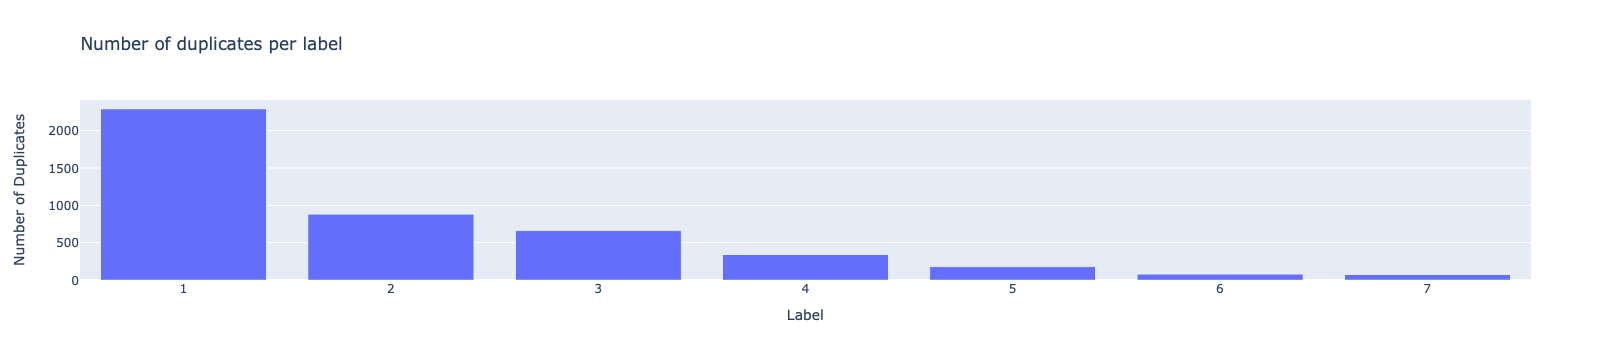

In [20]:
# Plot


# Assuming image_count_per_label_lesion_df is your DataFrame
# Create a bar plot
fig = px.bar(total_duplicated_images_per_label_df, x='label', y='nb_duplicates', title='Number of duplicates per label')
fig.update_xaxes(title_text='Label')
fig.update_yaxes(title_text='Number of Duplicates')

# Show the plot
fig.show()

In [21]:
# Save dataframe to csv
total_duplicated_images_per_label_df.to_csv("duplicates_stats_per_label.csv", index=False)
